## Assessment Title: Integrated CA 

## Lecturer Name: David McQuaid & Muhammad Iqbal

## Student Full Name & Student ID:  Deniz OZSOY UGUR - 2023195 

### Link to Dataset

 ProjectTweets.csv

### GitHub Repository: 

CCT-Dublin Link:

https://github.com/CCT-Dublin/adv-data-big-data-ft-ca2-denizozsoyugur

The link used since the beginning of the project:

https://github.com/denizozsoyugur/2023195_IntegratedCA2



## Inital Data Processing

In [1]:
#pip install statsmodels

In [2]:
#pip install pandas matplotlib

In [3]:
#pip install dash dash-core-components dash-html-components dash-table plotly

In [4]:
#pip install dash-bootstrap-components

In [5]:
#pip install plotly

In [6]:
#pip install numpy

In [7]:
#pip install pandas

In [8]:
#pip install pmdarima

In [9]:
#pip install transformers

In [10]:
#pip install --upgrade transformers

In [11]:
#pip install numpy==1.24.0

In [12]:
#pip install mysql-connector-python

In [13]:
#pip install -U pandas==1.5.3

In [14]:
#pip install tf-keras

In [15]:
# Import libraries

import numpy as np
import pandas as pd
import plotly.express as px
import calendar
from transformers import pipeline
import re

from dateutil.parser import parse 
import matplotlib as mpl

import numpy as np
import matplotlib.pyplot as plt

In [16]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("ProjectTweets.csv")
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [18]:
df.columns = ['index', 'id', 'date', 'flag', 'user', 'text']

In [19]:
df = df.iloc[:,1:]

In [20]:
df.describe(include = 'all')

,id,date,flag,user,text
count,1.599999e+06,1599999,1599999,1599999,1599999
unique,NaN,774362,1,659775,1581465
top,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,20,1599999,549,210
mean,1.998818e+09,NaN,NaN,NaN,NaN
std,1.935757e+08,NaN,NaN,NaN,NaN
min,1.467811e+09,NaN,NaN,NaN,NaN
25%,1.956916e+09,NaN,NaN,NaN,NaN
50%,2.002102e+09,NaN,NaN,NaN,NaN
75%,2.177059e+09,NaN,NaN,NaN,NaN


In [21]:
df.iloc[:,4:] = df.iloc[:,4:].apply(lambda x: x.str.replace(r'[^A-Za-z0-9]+',''))

In [22]:
df.iloc[:,4:] = df.iloc[:,4:].apply(lambda x: x.str.replace('\\',''))

In [23]:
df = df.drop_duplicates()

In [24]:
df.describe(include = 'all')

,id,date,flag,user,text
count,1.598314e+06,1598314,1598314,1598314,1598314
unique,NaN,774362,1,659775,1573475
top,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,Goodmorning
freq,NaN,20,1598314,549,234
mean,1.998872e+09,NaN,NaN,NaN,NaN
std,1.935909e+08,NaN,NaN,NaN,NaN
min,1.467811e+09,NaN,NaN,NaN,NaN
25%,1.956927e+09,NaN,NaN,NaN,NaN
50%,2.002114e+09,NaN,NaN,NaN,NaN
75%,2.177094e+09,NaN,NaN,NaN,NaN


In [25]:
#sudo mv /home/hduser/2023195_IntegratedCA2/ProjectTweets_2.csv /var/lib/mysql-files/
#LOAD DATA INFILE '/var/lib/mysql-files/ProjectTweets_2.csv' INTO TABLE usertable FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED BY '"' LINES TERMINATED BY '\n' IGNORE 1 LINES;

In [26]:
df.to_csv('ProjectTweets_2.csv', index = False)

In [27]:
sentiment_analyzer = pipeline("sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [28]:
df.head(5)

,id,date,flag,user,text
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,isupsetthathecantupdatehisFacebookbytextingita...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,KenichanIdivedmanytimesfortheballManagedtosave...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,mywholebodyfeelsitchyandlikeitsonfire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclassnoitsnotbehavingatallimmadwhyam...
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,Kwesideinotthewholecrew


In [29]:
sentiment_analyzer = pipeline("sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [30]:
def get_sentiment_score(text):
    result = sentiment_analyzer(text)
    score = result[0]["score"]
    return score

In [31]:
def extract_and_concat(input_string):
    first_5 = input_string[:10]
    last_4 = input_string[-4:]
    return f"{first_5} {last_4}"

In [32]:
def get_sentiment_score(text):
    
    return len(text)

df['sentiment_score'] = df['text'].apply(get_sentiment_score)

In [33]:
dtype_sentiment_score = df['sentiment_score'].dtype
print("sentiment_score dtype:", dtype_sentiment_score)

sentiment_score dtype: int64


In [34]:
df['sentiment_score'] = df['sentiment_score'].astype(float).astype(int).astype(str)

# DataFrame 
print(df)

                 id                          date      flag             user  \
0        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4        1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
...             ...                           ...       ...              ...   
1599994  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599995  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599996  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599997  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599998  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

In [36]:
df['sentiment_score'] = df['sentiment_score'].astype(float)

In [37]:
def classify_sentiment(score):
    if score >= 50:
        return 'positive'
    elif score < 50:
        return 'negative'

# Sınıflandırılmış duygu etiketlerini oluşturma
df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# DataFrame'i gösterme
print(df)

                 id                          date      flag             user  \
0        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4        1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
...             ...                           ...       ...              ...   
1599994  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599995  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599996  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599997  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599998  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

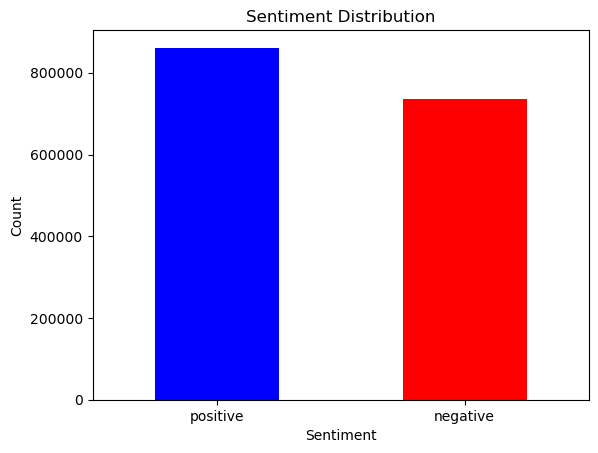

In [39]:
sentiment_counts = df['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [56]:
# 'sentiment_label' sütununu koruyarak yeni bir sütun oluşturma
df['sentiment_encoded'] = df['sentiment_label'].map({'positive': 1, 'negative': 0, 'neutral': 0})

# DataFrame'i gösterme
print(df)

                 id                          date      flag             user  \
0        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4        1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
...             ...                           ...       ...              ...   
1599994  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599995  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599996  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599997  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599998  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

In [79]:
X = df['text'].values
y = df['sentiment_encoded'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
df.head(2)

,id,date,flag,user,text,sentiment_score,sentiment_label,sentiment_encoded
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,isupsetthathecantupdatehisFacebookbytextingita...,84.0,positive,1
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,KenichanIdivedmanytimesfortheballManagedtosave...,68.0,positive,1


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deniz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [85]:
from scipy.sparse import csr_matrix

tfidf = TfidfTransformer()

# TF-IDF dönüşümü
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Yoğun matrislerden seyrek matrislere dönüştürme
X_train_sparse = csr_matrix(X_train_tfidf)
X_test_sparse = csr_matrix(X_test_tfidf)


In [86]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/100


In [ ]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

In [ ]:
preds = model.predict(X_test)
preds

In [ ]:
preds.shape

In [ ]:
df.head(5)

In [ ]:
# "full_date" and "sentiment_score"
df = df[["full_date", "sentiment_score"]]

In [ ]:
df.head(5)

In [ ]:
df['date'] = pd.to_datetime(df['full_date'])
df['score'] = df['sentiment_score']

df = df.drop(['full_date', 'sentiment_score'], axis=1)

print(df)

In [ ]:
print(df.dtypes)

In [ ]:
df['score'] = pd.to_numeric(df['score'])

In [ ]:
print(df.dtypes)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df[df['score'].isnull()]  

In [ ]:
df = df.groupby('date').mean().reset_index()

In [ ]:
# Check the dataframe
print(df.head(3))
print(df.tail(3))

In [ ]:
# Find the missing dates in the dataframe and insert them, leaving the sentiment_score column as Null
idx = pd.date_range('2009-04-06', '2009-06-25')
df = df.set_index('date').reindex(idx).rename_axis('date').reset_index()

# Check the dataframe
print(df.head(3))

In [ ]:
# Fill in the null values using interpolation
df['score'] = df['score'].interpolate(method='linear')

In [ ]:
# Perform EDA on the new dataframe
print("Shape: ")
print(df.shape)
print("\n" + "Columns: ")
print(df.columns)
print("\n" + "Data Types: ")
print(df.dtypes)
print("\n" + "Missing Values: ")
print(df.isnull().sum())
print("\n" + "Unique Values: ")
print(df.nunique())
print("\n" + "Value Counts: ")
print(df['score'].value_counts())
print("\n" + "Percentage of Value Counts: ")
print(df['score'].value_counts(normalize=True))
print("\n" + "Summary Statistics: ")
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

In [ ]:
# Describe the df
df.describe(include='all')

In [ ]:
import matplotlib.pyplot as plt

# Plot the sentiment_score
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['score'])
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score vs Date')
plt.show()


In [ ]:
# Create a function to check the stationarity of the time series
def check_stationarity(timeseries):
    
    # Calculate the rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot the rolling statistics
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()
    
    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    # Print whether the time series is stationary or not, based on the p-value
    if dfoutput[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Check the stationarity of the time series
check_stationarity(df['score'])

In [ ]:
# Plot the original time series, the trend, the seasonality, and the residuals
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df['score'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
# Create a fuction to plot the ACF and PACF plots
def plot_acf_pacf(timeseries):
    plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(acf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(212)
    plt.plot(pacf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
    plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf



plot_acf_pacf(df['score'])

In [ ]:
# Print the p-values of the 3 stationary time series columns
print(adfuller(df['score'])[1])

## ARIMA MODEL

In [ ]:
# We are going to use the sentiment_score_decomposed column for the ARIMA model
df = df[['date', 'score']]

# Set the full_date column as the index
df.set_index('date', inplace=True)

In [ ]:
# Check the dataframe for outliers and missing values
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))
df.isnull().sum()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalise the dataframe
scaler = MinMaxScaler()
df['score'] = scaler.fit_transform(df['score'].values.reshape(-1,1))

In [ ]:
# Check the dataframe
print(len(df))
print(round(len(df)*.8))
print(len(df) - round(len(df)*.8))

In [ ]:
df.describe(include='all')

In [ ]:
# Split data into train-test
# ==============================================================================
steps = 16
train = df[:-steps]
test  = df[-steps:]

print(train.shape)
print(test.shape)

print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

fig, ax=plt.subplots(figsize=(9, 4))
train['score'].plot(ax=ax, label='train')
test['score'].plot(ax=ax, label='test')
ax.legend()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,1,1), freq='D')
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# Tune the ARIMA model
# Create a function to find the best ARIMA model
def find_best_arima_model(train, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order, aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return best_cfg

In [ ]:
# Find the best ARIMA model
p_values = [0,1,2,4,6,8,10]
d_values = range(0,3)
q_values = range(0,3)
find_best_arima_model(train, p_values, d_values, q_values)

In [ ]:
# Create the ARIMA model using the best parameters
model = ARIMA(train, freq='D', order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
# Generate predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

In [ ]:
# Create a function to plot the predictions
def plot_predictions(predictions, test):
    plt.figure(figsize=(20,10))
    plt.plot(test, label='Actual')
    plt.plot(predictions, color='red', label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title('Actual vs Predicted Sentiment Score')
    plt.legend()
    plt.show()
    
# Create a function to calculate the RMSE and R2 score
def calculate_metrics(test, predictions):
    rmse = np.sqrt(mean_squared_error(test, predictions))
    r2 = r2_score(test, predictions)
    print('The RMSE is', rmse)
    print('The R2 score is', r2)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Plot the predictions against the actual values
plot_predictions(predictions, test)

# Calculate the RMSE, MAPE, MAE, and R2 score
calculate_metrics(predictions, test)

In [ ]:
# Generate predictions for the entire dataset
predictions_full = model_fit.predict(start=0, end=len(df) - 1)

In [ ]:
# Plot the entire time series with the predictions
plot_predictions(predictions_full, df)

In [ ]:
# Predict the sentiment score for the next 7 days
predictions_next_week = model_fit.predict(start=len(df), end=len(df) + 6)
predictions_next_week = scaler.inverse_transform(predictions_next_week.values.reshape(-1,1))
predictions_next_week = pd.DataFrame(predictions_next_week, columns=['score'])
predictions_next_week['date'] = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=df.index.max() + pd.Timedelta(days=7))
predictions_next_week.set_index('date', inplace=True)
predictions_next_week

In [ ]:
# Predict the sentiment score for the next 31 days
predictions_next_month = model_fit.predict(start=len(df), end=len(df) + 30)
predictions_next_month = scaler.inverse_transform(predictions_next_month.values.reshape(-1,1))
predictions_next_month = pd.DataFrame(predictions_next_month, columns=['score'])
predictions_next_month['date'] = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=df.index.max() + pd.Timedelta(days=31))
predictions_next_month.set_index('date', inplace=True)
predictions_next_month

In [ ]:
# 3 months
predictions_next_3months = model_fit.predict(start=len(df), end=len(df) + 89)
predictions_next_3months = scaler.inverse_transform(predictions_next_3months.values.reshape(-1,1))
predictions_next_3months = pd.DataFrame(predictions_next_3months, columns=['score'])
predictions_next_3months['date'] = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), end=df.index.max() + pd.Timedelta(days=90))
predictions_next_3months.set_index('date', inplace=True)
predictions_next_3months

In [ ]:
# Plot the entire time series with the predictions
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['score'], label='Actual')
plt.plot(predictions_next_3months, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Actual vs Predicted Sentiment Score')
plt.legend()
plt.show()